<a href="https://colab.research.google.com/github/snoop2head/OIA_Text_Wrangling/blob/master/wordcloud_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install PyDrive

In [0]:
!pip install soynlp

     |████████████████████████████████| 419kB 2.7MB/s 


In [0]:
import pandas as pd
import numpy as np
import re

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
url ='https://drive.google.com/file/d/1wQi04BOT2B0YMLNeCECvDY2A8mPSUWpH'
id = '1wQi04BOT2B0YMLNeCECvDY2A8mPSUWpH'

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('DK000003.csv_text_data.csv')

In [0]:
df = pd.read_csv('DK000003.csv_text_data.csv')
# 데이터의 크기가 어느정도인지 본다.
df.shape

(70, 9)

In [0]:
df.tail()

,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
65,내가 다녀온 코펜하겐 대학은 여타의 유럽 대학과 마찬가지로 각기 학부가 분산된 형태...,인문학부(인문학부는 그나마 각과가 한 캠퍼스에 같이 위치한다) 캠퍼스는 시내에 위치...,덴마크는 세계에서 두번째로 물가가 비싼 나라라고 알려져 있다. 그러나 전혀 걱정할 ...,수업은 잘 골라야 한다. 어떤 수업은 심각하게 재미가 없을 수도 있다. 그러나 잘만...,"Norreport 역 근처에 있다. 덴마트 발음으로 ""뇌레포-오트""라고 한다. 지하...","덴마크인은 매우 혁신적인, 때로는 위험스러워 보이기까지 하는 사고방식을 가는 민족이...",나는 덴마크인들이 주로 사는 아파트에 있었기 때문에 덴마크인들과 접촉할 기회가 매우...,NaN,NaN
66,건물로만 보았을 때 그리 큰 규모의 대학은 아니다. 특히 연세대학교처럼 모든 단과대...,코펜하겐은 비록 덴마크라는 한 나라의 수도지만 서울과는 분위기가 아주 다르다. 물론...,단과 대학이 한 캠퍼스에 있지 않은 관계로 학교내의 기숙사는 없다. 그러나 학교에서...,코펜하겐 대학교에서의 수업은 maximam 3과목이었다. 그만큼 한과목당 교수님이 ...,international office는 fiorstraede 라는 시내의 한 보행자...,"코펜하겐은 비록 파리나 밀라노, 런던처럼 많은 사람이 모여사는 화려하고 큰 도시는 ...","문화적인 면에서의 큰 충격은 별로 없었다. 다만 북쪽에 사는 사람들이어서 그런지, ...","멘토링 system을 적극적으로 이용하는 것이 가장 중요하다. 나의 경우는, 한국학...",개인적으로 시끄러운 대도시 분위기를 좋아하는 나로서는 처음에 이런 고요한 동네가 적...
67,코펜하겐 대학은 캠퍼스가 아닙니다. 왕립대학의 역사답게 각 단과대가 연구실과 독립적...,"덴마크를 비롯한 유럽의 대학가는 학국의 대학과와 분위기가 다릅니다.\n먼저, 코펜하...",저는 1년간 Spaniensgade 기숙사에서 지냈습니다. 코펜하겐의 동남쪽인 아마...,저는 2학기 동안 전공 4개와 영어교양 하나를 들었습니다.\n\n먼저 유럽대학의 학...,"앞서 말했다시피 네로포트에 위치해 있습니다. 수업에서 부터 안전, 신상까지 모두 책...",정치학과의 경우 맨토 시스템이 아주 잘 되어 있습니다. 매학기 100정도의 교환학생...,주로 세계에서 온 교환학생들과 시간을 보냈기 때문에 덴마크학생들과 많은 교류는 없었...,1. 맨토(현실적으로 가장 큰 도움이 됩니다)\n2. 국제 교류부와 아카데미 어드바...,"제가 코펜하겐대학교를 선택한 이유.\n\n첫째, 유럽에 가고 싶었습니다. 학부생으로..."
68,"코펜하겐 대학은 500년 이상의 역사를 가진 덴마크 최고의 대학이다. 인문,경제,정...",주로 인문대와 법과 대학의 건물에서 수업을 들었다.인문대는 기숙사와 가깝고 운하 가...,spaniensgade라는 인문대에서 가까운 학생 기숙사에살았다. 기숙사라고는 하지...,수업은 코펜하겐 대학에서 방학기간에는 덴마크어 랭귀지 코스를 들었으며 학기 중에는 ...,국제교류부는 시내 중심에 있어 찾아가기가 편리하고 많은 도움을 받을 수있다. 비자 ...,매주 금요일에는 student house 라는 학생 카페에서 교환 학생들이 모이게 ...,"솔직히 나쁜 의미에서의 culture shock는 없었다.\n안전함, 평온함과 특히...",국제 교류부 뿐만 아니라 여러가지를 도와주는 mentor와 친해진다면 덴마크를 조금...,코펜하겐 대학을 택한것은 유럽 여행을 다녀 온 후 유럽에서 공부를 해좠으면 하는 마...
69,너무 아름다운 도시다. 코펜하겐은. 자그마하고 서울에 비하면 수도라고도 할 수 없지...,NaN,북유럽 물가가 비싼 것은 유명하다. 맥도날드 빅맥 세트가 8000원대니깐. 하지만 ...,수업은 두 과목 이상 못듣는다. 하지만 한과목 비중이 정말 크고 해야할 숙제도 정말...,일주일에 한번 교환학생들의 파티 같은 게 열린다. 몇번 가면 재밌고 초반에는 많이 ...,랭귀지 스쿨을 학교에서 공짜로 등록해 주는데 친구들 만나기에 참 좋은 코스이므로 나...,NaN,"교환학생 생활을 어떻게 하느냐는 어디를 가던, 자신이 만들어가는 것 같다. 나는 정...",난 정말 혼자만 가고 싶었다. 사실 영어를 익히러 간다는 것보다는 새로운 상황에서\...


In [0]:
basic_info_df = df['gen_info']
print(basic_info_df)

0     저는 경제학과여서 코펜하겐 대학교 CSS 캠퍼스를 이용했는데 Norreport 역 ...
1     저는 시내 중심에 있는 사회과학대학교 캠퍼스와 islands brygge 역(아마지...
2     코펜하겐 대학교는 일단 4개의 캠퍼스로 구성되어 있습니다. 저는 그 중에서도 언론홍...
3     저는 경제학과라 CSS에서 공부하였습니다. 한국이랑 다르게 캠퍼스가 단과대별로 도시...
4     저희 정치외교학과가 있던 캠퍼스는 CSS였는데, 코펜하겐에서 가장 번화가라고 할 수...
                            ...                        
65    내가 다녀온 코펜하겐 대학은 여타의 유럽 대학과 마찬가지로 각기 학부가 분산된 형태...
66    건물로만 보았을 때 그리 큰 규모의 대학은 아니다. 특히 연세대학교처럼 모든 단과대...
67    코펜하겐 대학은 캠퍼스가 아닙니다. 왕립대학의 역사답게 각 단과대가 연구실과 독립적...
68    코펜하겐 대학은 500년 이상의 역사를 가진 덴마크 최고의 대학이다. 인문,경제,정...
69    너무 아름다운 도시다. 코펜하겐은. 자그마하고 서울에 비하면 수도라고도 할 수 없지...
Name: gen_info, Length: 70, dtype: object


In [0]:
basic_info_df.tail(2)

68    코펜하겐 대학은 500년 이상의 역사를 가진 덴마크 최고의 대학이다. 인문,경제,정...
69    너무 아름다운 도시다. 코펜하겐은. 자그마하고 서울에 비하면 수도라고도 할 수 없지...
Name: gen_info, dtype: object

In [0]:
sample_index = 24
sample_content =basic_info_df[sample_index]
sample_content

'캠퍼스가 도시 여러군데 흩어져 있지만 각 캠퍼스의 도서관이나 시설을 사용할수있어 어디에 있든 공부를 하러 갈 수 있습니다. 도시 중심에서 아주 멀리 떨어져 있는 캠퍼스는 없는 걸로 압니다. 코픈하겐의 생활은 수준이 엄청 높지만 비가 자주 오고 바람이 많이 불기 때문에 이런 기후가 적성에 맞지 않는 분들은 잘 선택하시길!'

In [0]:
from soynlp.tokenizer import RegexTokenizer
tokenizer = RegexTokenizer()

tokenized_content = tokenizer.tokenize(sample_content)
tokenized_content[:20]


['캠퍼스가',
 '도시',
 '여러군데',
 '흩어져',
 '있지만',
 '각',
 '캠퍼스의',
 '도서관이나',
 '시설을',
 '사용할수있어',
 '어디에',
 '있든',
 '공부를',
 '하러',
 '갈',
 '수',
 '있습니다',
 '.',
 '도시',
 '중심에서']

In [0]:
print(len(tokenized_content))

50


In [0]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [0]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = df['gen_info'].apply(preprocessing)

CPU times: user 2.27 ms, sys: 0 ns, total: 2.27 ms
Wall time: 3.67 ms


In [0]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 62.2 ms, sys: 2.92 ms, total: 65.1 ms
Wall time: 70.9 ms


0    [저는, 경제학과여서, 코펜하겐, 대학교, CSS, 캠퍼스를, 이용했는데, Norr...
1    [저는, 시내, 중심에, 있는, 사회과학대학교, 캠퍼스와, islands, bryg...
2    [코펜하겐, 대학교는, 일단, 4, 개의, 캠퍼스로, 구성되어, 있습니다, ., 저...
Name: gen_info, dtype: object

In [0]:
tokens[sample_index][:10]

['캠퍼스가', '도시', '여러군데', '흩어져', '있지만', '각', '캠퍼스의', '도서관이나', '시설을', '사용할수있어']

In [0]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [0]:
!pip install wordcloud

In [0]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가',
                '그럼', '이런', '저런', '합니다',
                '많은', '많이', '정말', '너무'] 

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords_kr, 
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

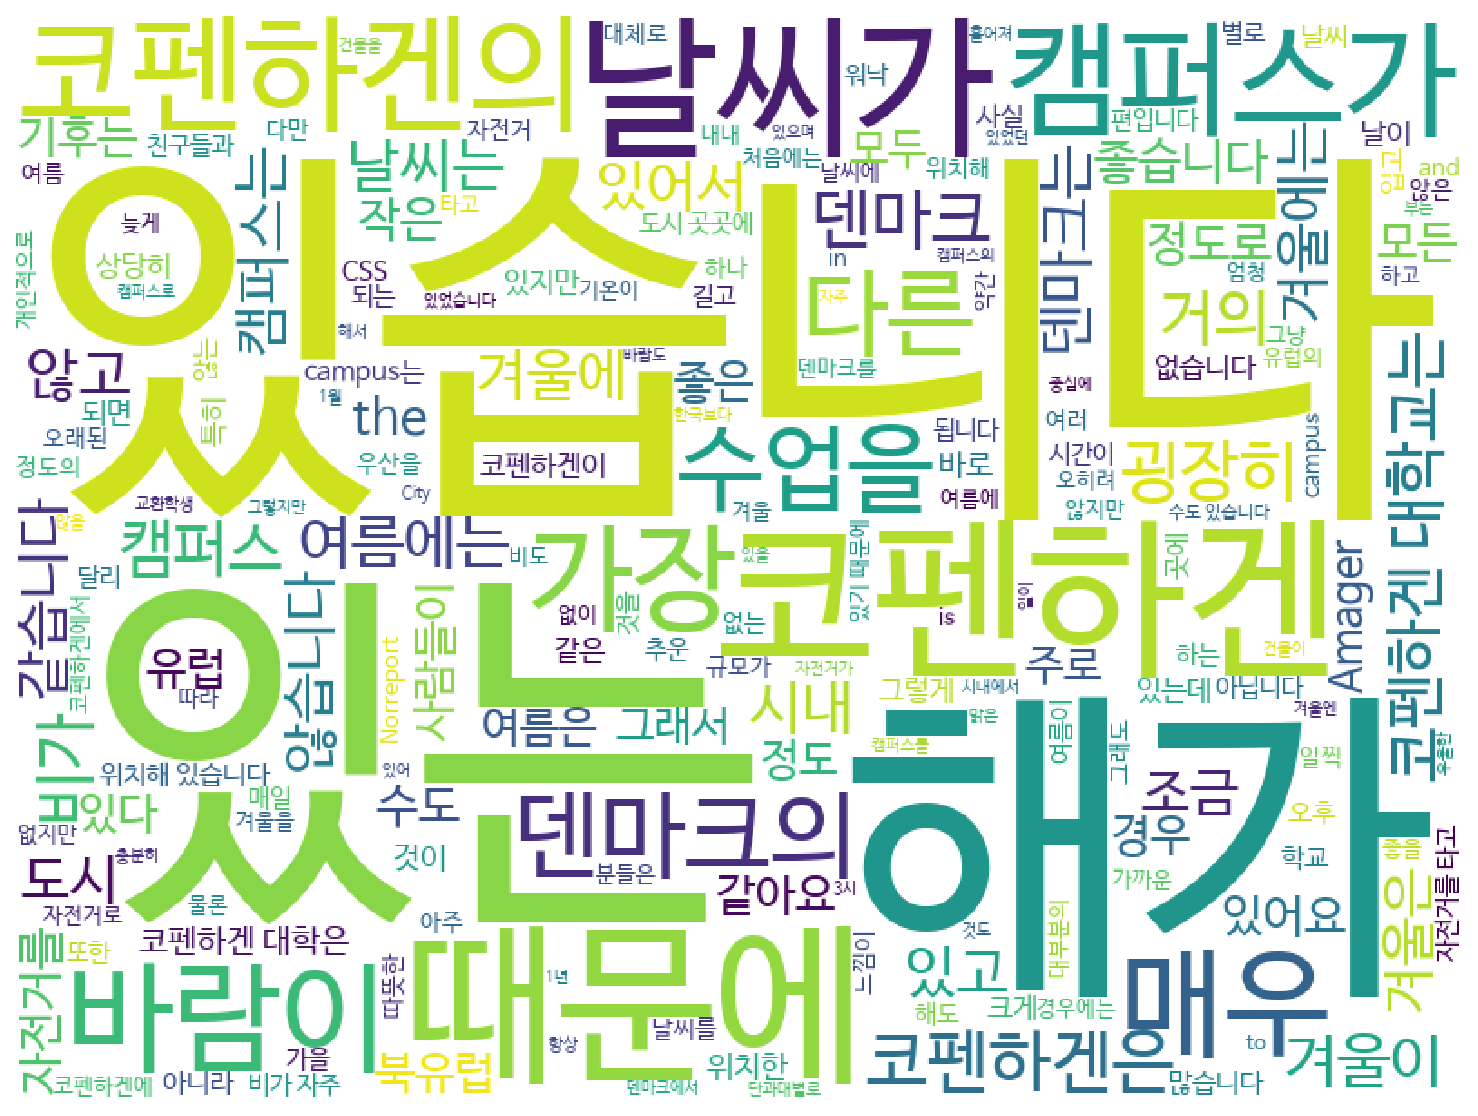

CPU times: user 2.05 s, sys: 97.5 ms, total: 2.15 s
Wall time: 2.17 s


In [0]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(sentences))

In [0]:
from soynlp.noun import LRNounExtractor

In [0]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (1035, 509) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 160 nouns are extracted
CPU times: user 125 ms, sys: 5.77 ms, total: 131 ms
Wall time: 135 ms


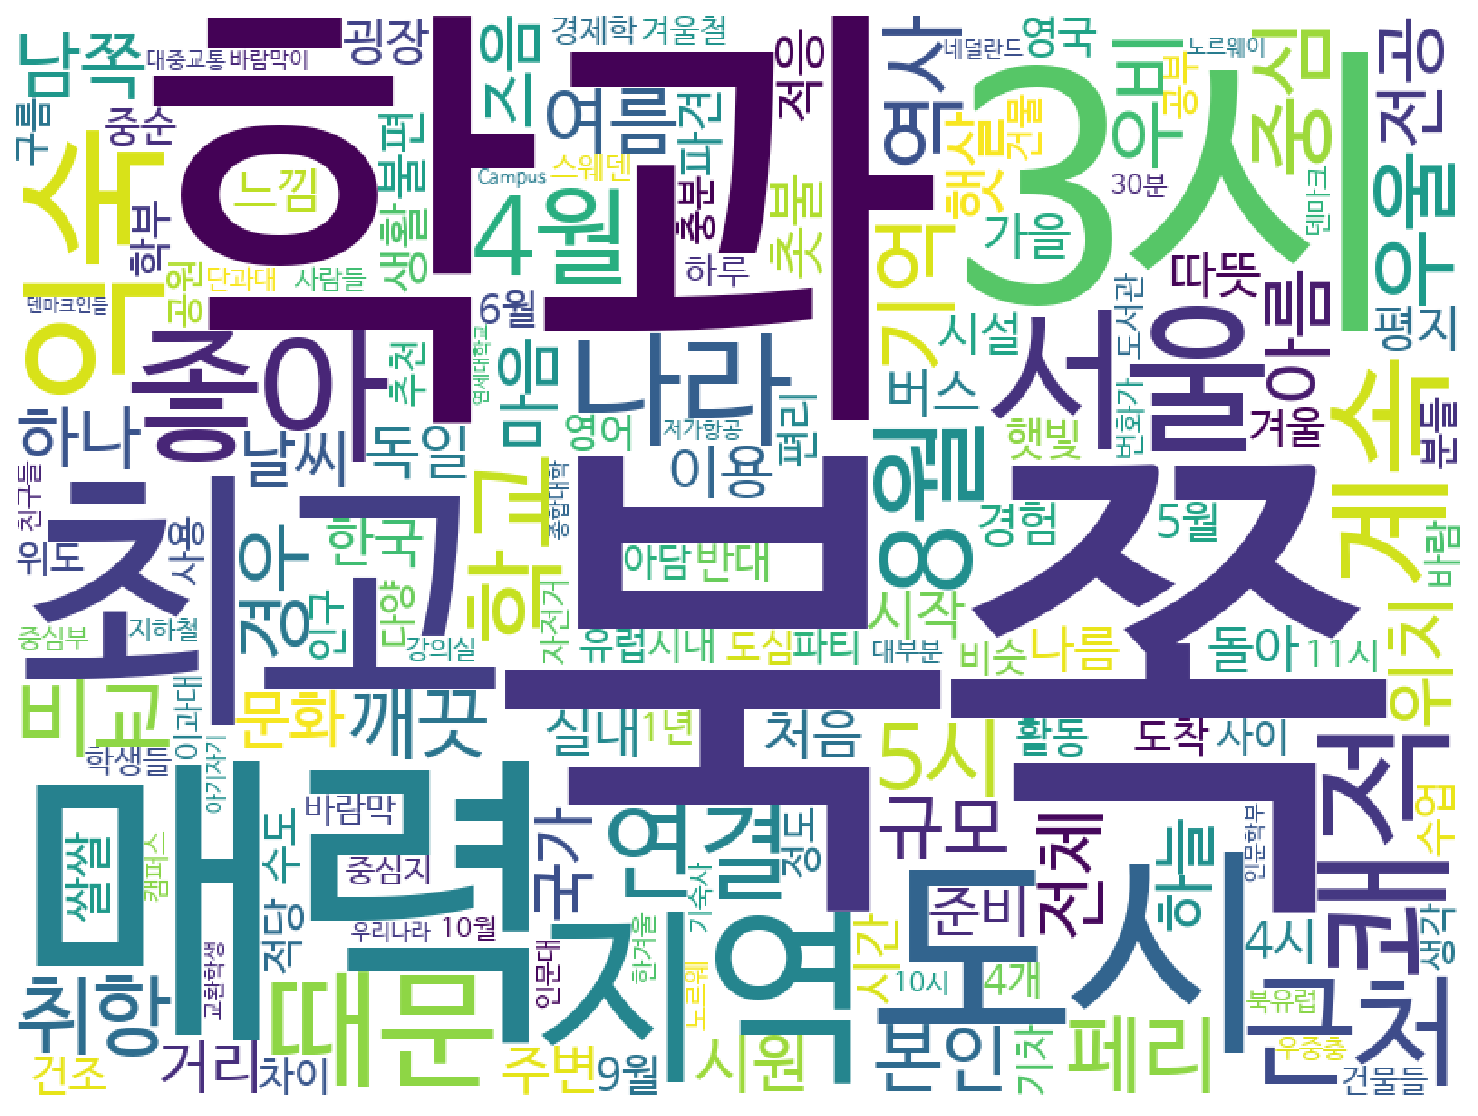

CPU times: user 1.91 s, sys: 72.6 ms, total: 1.98 s
Wall time: 1.99 s


In [0]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))